In [23]:
from skimage.io import imread
from pathlib import Path
from skimage.io import imread, imsave
from cellpose import models, io, utils
import os
import numpy as np
from tnia.deeplearning.dl_helper import quantile_normalization 
from tnia.plotting.plt_helper import imshow_multi2d, random_label_cmap
import matplotlib.pyplot as plt
im_name = r'C:\Users\bnort\work\ImageJ2022\tnia\notebooks-and-napari-widgets-for-dl\data\ladybugs_series\8220954_10897041.jpg'
im_name = r'C:\Users\bnort\work\ImageJ2022\tnia\notebooks-and-napari-widgets-for-dl\data\ladybugs_series\15081929_22523284.jpg'
im = imread(im_name)

In [26]:
parent_path = r'C:\Users\bnort\work\ImageJ2022\tnia\notebooks-and-napari-widgets-for-dl\data\ladybugs_series'
model_path = os.path.join(parent_path, 'models')

model = models.CellposeModel(gpu=True, model_type=None, pretrained_model= os.path.join(model_path, 'cellpose_ladybugs_scale2'))


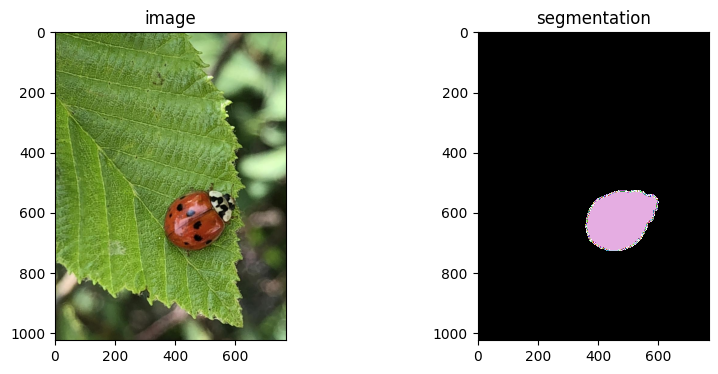

In [30]:
normal = quantile_normalization(im)

seg = model.eval(normal, diameter=30, cellprob_threshold=-1, channels=[0,1], normalize=False)

fig = imshow_multi2d([im, seg[0]],['image', 'segmentation'], 1, 2, colormaps=['gray', random_label_cmap()])